## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  58.956528  1466.936921  0.388922  9.602866  1.398150
1  89.414752  1758.815549  0.739099  9.408417  1.526975
2  14.712164   742.842310  0.986902  7.560990  1.596423
3  85.651157   363.787911  0.024880  5.932200  0.021677
4  47.846633   795.858969  0.962688  9.610123  1.466618


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0687616	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0581258	total: 58.4ms	remaining: 29.1s
2:	learn: 1.0492224	total: 58.8ms	remaining: 19.5s
3:	learn: 1.0398578	total: 59.1ms	remaining: 14.7s
4:	learn: 1.0300204	total: 59.6ms	remaining: 11.9s
5:	learn: 1.0215148	total: 60.1ms	remaining: 9.96s
6:	learn: 1.0132472	total: 60.6ms	remaining: 8.6s
7:	learn: 1.0030073	total: 61.1ms	remaining: 7.57s
8:	learn: 0.9942709	total: 61.6ms	remaining: 6.78s
9:	learn: 0.9839683	total: 62ms	remaining: 6.14s
10:	learn: 0.9759306	total: 62.6ms	remaining: 5.63s
11:	learn: 0.9672758	total: 63.1ms	remaining: 5.2s
12:	learn: 0.9592284	total: 63.5ms	remaining: 4.82s
13:	learn: 0.9519854	total: 63.9ms	remaining: 4.5s
14:	learn: 0.9445217	total: 64.4ms	remaining: 4.23s
15:	learn: 0.9348009	total: 64.8ms	remaining: 3.98s
16:	learn: 0.9262057	total: 65.2ms	remaining: 3.77s
17:	learn: 0.9184916	total: 65.6ms	remaining: 3.58s
18:	learn: 0.9114921	total: 66ms	remaining: 3.41s

114:	learn: 0.4619773	total: 108ms	remaining: 830ms
115:	learn: 0.4594576	total: 108ms	remaining: 826ms
116:	learn: 0.4569235	total: 109ms	remaining: 822ms
117:	learn: 0.4534267	total: 109ms	remaining: 818ms
118:	learn: 0.4509438	total: 110ms	remaining: 814ms
119:	learn: 0.4487283	total: 110ms	remaining: 810ms
120:	learn: 0.4462258	total: 111ms	remaining: 805ms
121:	learn: 0.4438170	total: 111ms	remaining: 802ms
122:	learn: 0.4413828	total: 112ms	remaining: 796ms
123:	learn: 0.4394163	total: 112ms	remaining: 792ms
124:	learn: 0.4370912	total: 113ms	remaining: 789ms
125:	learn: 0.4345733	total: 113ms	remaining: 785ms
126:	learn: 0.4319052	total: 114ms	remaining: 782ms
127:	learn: 0.4297059	total: 114ms	remaining: 778ms
128:	learn: 0.4267807	total: 115ms	remaining: 774ms
129:	learn: 0.4243344	total: 115ms	remaining: 770ms
130:	learn: 0.4220455	total: 115ms	remaining: 766ms
131:	learn: 0.4199481	total: 116ms	remaining: 762ms
132:	learn: 0.4175818	total: 116ms	remaining: 758ms
133:	learn: 

289:	learn: 0.2152594	total: 186ms	remaining: 455ms
290:	learn: 0.2139898	total: 186ms	remaining: 454ms
291:	learn: 0.2130096	total: 187ms	remaining: 453ms
292:	learn: 0.2120631	total: 187ms	remaining: 452ms
293:	learn: 0.2115547	total: 188ms	remaining: 451ms
294:	learn: 0.2109013	total: 188ms	remaining: 449ms
295:	learn: 0.2103289	total: 189ms	remaining: 448ms
296:	learn: 0.2094581	total: 189ms	remaining: 447ms
297:	learn: 0.2090162	total: 189ms	remaining: 446ms
298:	learn: 0.2085808	total: 190ms	remaining: 445ms
299:	learn: 0.2073951	total: 190ms	remaining: 444ms
300:	learn: 0.2067843	total: 191ms	remaining: 443ms
301:	learn: 0.2063589	total: 191ms	remaining: 442ms
302:	learn: 0.2058220	total: 192ms	remaining: 441ms
303:	learn: 0.2048975	total: 192ms	remaining: 439ms
304:	learn: 0.2045495	total: 192ms	remaining: 438ms
305:	learn: 0.2038934	total: 193ms	remaining: 437ms
306:	learn: 0.2035367	total: 193ms	remaining: 436ms
307:	learn: 0.2027217	total: 194ms	remaining: 435ms
308:	learn: 

533:	learn: 0.1008821	total: 290ms	remaining: 253ms
534:	learn: 0.1005053	total: 290ms	remaining: 252ms
535:	learn: 0.1000714	total: 291ms	remaining: 252ms
536:	learn: 0.0996767	total: 291ms	remaining: 251ms
537:	learn: 0.0992906	total: 291ms	remaining: 250ms
538:	learn: 0.0988431	total: 292ms	remaining: 250ms
539:	learn: 0.0983992	total: 292ms	remaining: 249ms
540:	learn: 0.0981226	total: 293ms	remaining: 248ms
541:	learn: 0.0978511	total: 293ms	remaining: 248ms
542:	learn: 0.0974294	total: 294ms	remaining: 247ms
543:	learn: 0.0971224	total: 294ms	remaining: 247ms
544:	learn: 0.0968578	total: 295ms	remaining: 246ms
545:	learn: 0.0965183	total: 295ms	remaining: 245ms
546:	learn: 0.0961250	total: 296ms	remaining: 245ms
547:	learn: 0.0957830	total: 296ms	remaining: 244ms
548:	learn: 0.0953762	total: 296ms	remaining: 243ms
549:	learn: 0.0949773	total: 297ms	remaining: 243ms
550:	learn: 0.0944228	total: 297ms	remaining: 242ms
551:	learn: 0.0940241	total: 298ms	remaining: 242ms
552:	learn: 

709:	learn: 0.0530952	total: 367ms	remaining: 150ms
710:	learn: 0.0530189	total: 368ms	remaining: 149ms
711:	learn: 0.0529037	total: 368ms	remaining: 149ms
712:	learn: 0.0527106	total: 368ms	remaining: 148ms
713:	learn: 0.0525894	total: 369ms	remaining: 148ms
714:	learn: 0.0525297	total: 369ms	remaining: 147ms
715:	learn: 0.0524106	total: 370ms	remaining: 147ms
716:	learn: 0.0523510	total: 370ms	remaining: 146ms
717:	learn: 0.0522731	total: 370ms	remaining: 146ms
718:	learn: 0.0521561	total: 371ms	remaining: 145ms
719:	learn: 0.0520974	total: 371ms	remaining: 144ms
720:	learn: 0.0519729	total: 372ms	remaining: 144ms
721:	learn: 0.0518581	total: 372ms	remaining: 143ms
722:	learn: 0.0517450	total: 373ms	remaining: 143ms
723:	learn: 0.0516686	total: 374ms	remaining: 142ms
724:	learn: 0.0515573	total: 374ms	remaining: 142ms
725:	learn: 0.0514465	total: 375ms	remaining: 141ms
726:	learn: 0.0513367	total: 375ms	remaining: 141ms
727:	learn: 0.0512286	total: 375ms	remaining: 140ms
728:	learn: 

949:	learn: 0.0304750	total: 471ms	remaining: 24.8ms
950:	learn: 0.0303624	total: 471ms	remaining: 24.3ms
951:	learn: 0.0302976	total: 472ms	remaining: 23.8ms
952:	learn: 0.0302543	total: 472ms	remaining: 23.3ms
953:	learn: 0.0301527	total: 473ms	remaining: 22.8ms
954:	learn: 0.0301100	total: 473ms	remaining: 22.3ms
955:	learn: 0.0300341	total: 473ms	remaining: 21.8ms
956:	learn: 0.0299253	total: 474ms	remaining: 21.3ms
957:	learn: 0.0297949	total: 474ms	remaining: 20.8ms
958:	learn: 0.0297527	total: 474ms	remaining: 20.3ms
959:	learn: 0.0296786	total: 475ms	remaining: 19.8ms
960:	learn: 0.0295827	total: 475ms	remaining: 19.3ms
961:	learn: 0.0295467	total: 476ms	remaining: 18.8ms
962:	learn: 0.0294743	total: 476ms	remaining: 18.3ms
963:	learn: 0.0293491	total: 477ms	remaining: 17.8ms
964:	learn: 0.0292781	total: 477ms	remaining: 17.3ms
965:	learn: 0.0292086	total: 478ms	remaining: 16.8ms
966:	learn: 0.0291673	total: 478ms	remaining: 16.3ms
967:	learn: 0.0290949	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

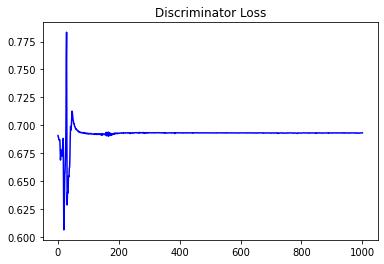

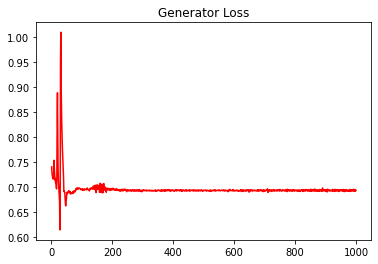

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21774239587737296


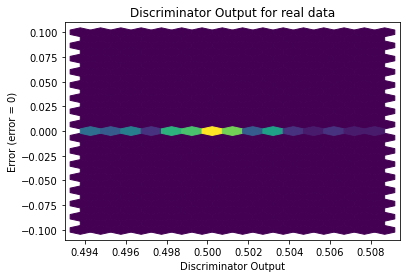

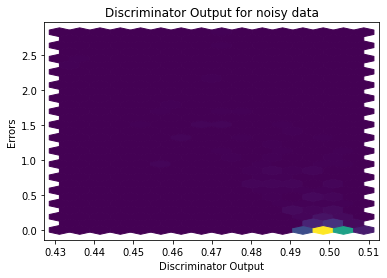

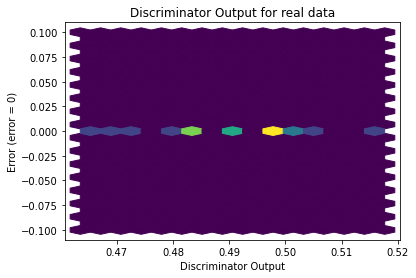

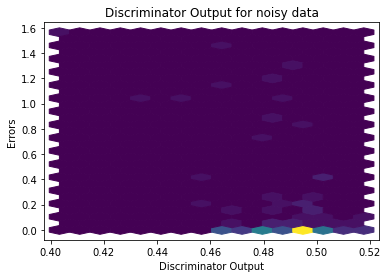

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


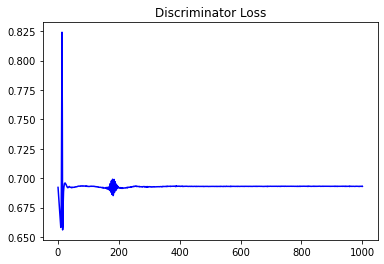

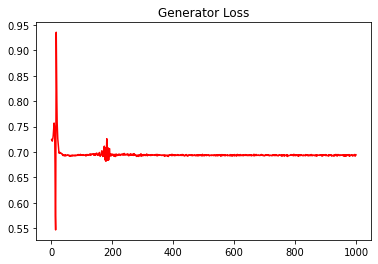

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21900806215924498


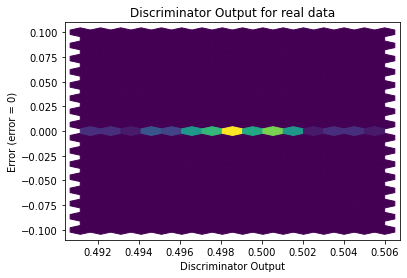

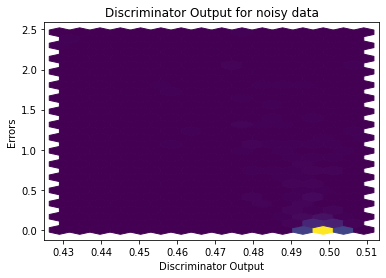

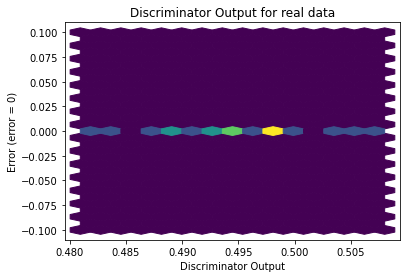

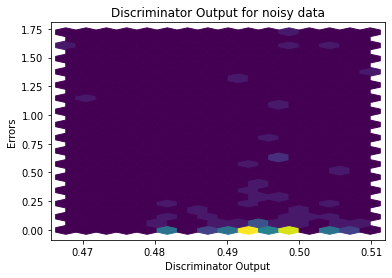

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0725]], requires_grad=True)
